In [65]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [66]:
# Read the dataset
car_data = pd.read_csv('Dataset.csv')
car_data

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
74995,BMW,2016,12998,Manual,20565,Diesel,0,74.3,1.5
74996,toyota,2017,6995,Manual,20564,Petrol,150,68.9,1.0
74997,Ford,2018,10990,Manual,20563,Petrol,145,65.7,1.0
74998,Ford,2017,7999,Manual,28907,Petrol,125,54.3,1.2


In [67]:
# Select the features and target variable
features =['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize']
target = 'price'

In [68]:
# Create a copy of the DataFrame
df = car_data[features + [target]].copy()

In [69]:
# Perform label encoding on categorical columns
label_encoder = LabelEncoder()
for column in ['model', 'transmission', 'fuelType']:
    df[column] = label_encoder.fit_transform(df[column])

In [70]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.05, random_state=42)

In [71]:
# Scale the features and target variables
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1))

In [72]:
# Reshape the input data for LSTM
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

In [73]:
# Create the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(1, len(features))))
model.add(Dense(1))

In [74]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [75]:
# Train the model
model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
2227/2227 [==============================] - 8s 2ms/step - loss: 332058912.0000
Epoch 2/50
2227/2227 [==============================] - 6s 3ms/step - loss: 328239744.0000
Epoch 3/50
2227/2227 [==============================] - 6s 3ms/step - loss: 324782976.0000
Epoch 4/50
2227/2227 [==============================] - 6s 3ms/step - loss: 321380928.0000
Epoch 5/50
2227/2227 [==============================] - 6s 3ms/step - loss: 318007520.0000
Epoch 6/50
2227/2227 [==============================] - 6s 3ms/step - loss: 314660064.0000
Epoch 7/50
2227/2227 [==============================] - 7s 3ms/step - loss: 311336992.0000
Epoch 8/50
2227/2227 [==============================] - 6s 3ms/step - loss: 308037440.0000
Epoch 9/50
2227/2227 [==============================] - 7s 3ms/step - loss: 304761312.0000
Epoch 10/50
2227/2227 [==============================] - 6s 3ms/step - loss: 301512256.0000
Epoch 11/50
2227/2227 [==============================] - 7s 3ms/step - loss: 298286208.00

In [76]:
# Make predictions on the test set
y_pred_scaled = model.predict(X_test_reshaped)

118/118 [==============================] - 1s 1ms/step


In [77]:
# Inverse scale the predictions and actual prices
y_pred_inverse = scaler.inverse_transform(y_pred_scaled).flatten()
y_test_inverse = scaler.inverse_transform(y_test.values.reshape(-1, 1)).flatten()

In [78]:
# Evaluate the model
mse = mean_squared_error(y_test_inverse, y_pred_inverse)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_inverse, y_pred_inverse)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error: 4089103489194686464.00
Root Mean Squared Error: 2022153181.44
R^2 Score: -1.25


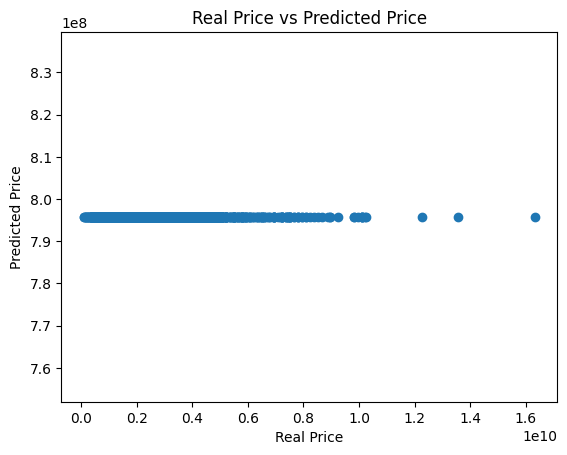

In [80]:
# Plotting the real price vs predicted price
plt.scatter(y_test_inverse, y_pred_inverse)
plt.xlabel('Real Price')
plt.ylabel('Predicted Price')
plt.title('Real Price vs Predicted Price')
plt.show()